### About the data set (Bank Client Data)

#### Bank client data:
**age:** Age of the client<br>
**duration:** last contact duration, in seconds.<br> 

#### Other attributes:
**campaign:** number of contacts performed during this campaign and for this client<br>
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)<br>
**previous:** number of contacts performed before this campaign and for this client<br>

#### Social and economic context attributes
**emp.var.rate:** employment variation rate - quarterly indicator<br>
**cons.price.idx:** consumer price index - monthly indicator<br>
**cons.conf.idx:** consumer confidence index - monthly indicator<br>
**euribor3m:** euribor 3 month rate - daily indicator<br>
**nr.employed:** number of employees - quarterly indicator<br>

**y** - (Output variable) has the client subscribed a term deposit?

Data citation: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Table of Content

1. **[Data Preprocessing](#dp)**
1. **[K Nearest Neighbors (KNN)](#knn)**
2. **[Naive Bayes](#nb)**

**Import the required libraries**

In [1]:
# type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

#### Load the csv file

In [2]:
# type your code here

df = pd.read_csv('bank.csv')
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,205,2,999,0,1.1,93.994,-36.4,4.858,5191.0,no
1,32,691,10,999,0,1.4,93.918,-42.7,4.960,5228.1,yes
2,45,45,8,999,0,1.4,93.444,-36.1,4.963,5228.1,no
3,33,400,1,5,2,-1.1,94.601,-49.5,1.032,4963.6,yes
4,47,903,2,999,1,-1.8,93.075,-47.1,1.415,5099.1,yes


<a id="dp"> </a>
## 1. Data Preprocessing

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Remove the outliers (if any).</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# type your code here

df.skew()

age               0.990535
duration          2.256322
campaign          5.098841
pdays            -2.549356
previous          2.895599
emp.var.rate     -0.181234
cons.price.idx   -0.125216
cons.conf.idx     0.350442
euribor3m        -0.058332
nr.employed      -0.463581
dtype: float64

<Axes: >

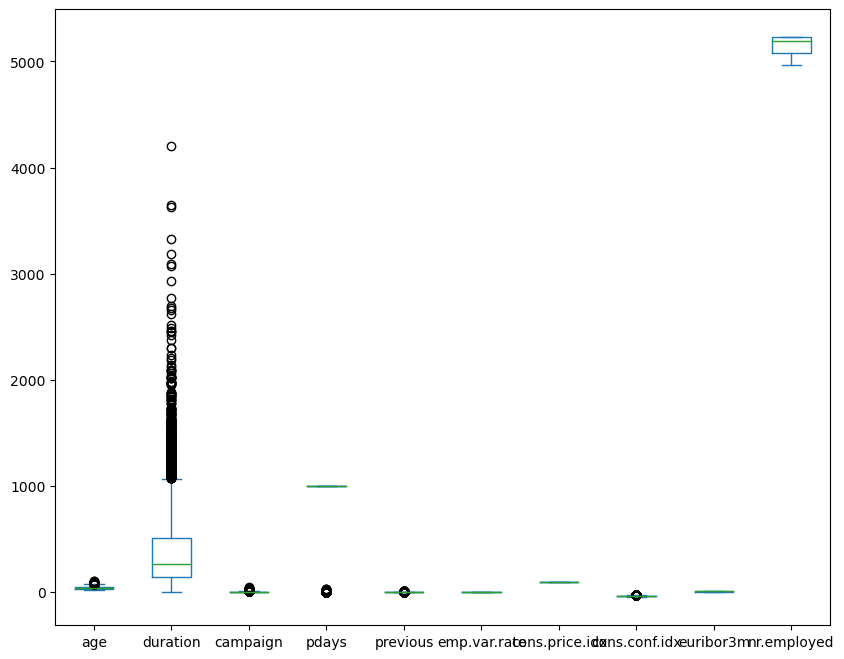

In [5]:
plt.rcParams['figure.figsize']=[10,8]
df.plot(kind='box')    

In [6]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

iqr = q3 - q1

ll = q1 - 1.5*iqr
ul = q3 + 1.5*iqr

df2 = df[~((df < ll) | (df > ul)).any(axis = 1)]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Separate the dependent and the independent variables. Also, in the target variable, replace no with 0 and yes with 1.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# type your code here
x = df.drop('y',axis=1)
y = df['y']

In [8]:
y = y.map({'no':0,'yes':1})
y.head()

0    0
1    1
2    0
3    1
4    1
Name: y, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Replace the value "unknown" from each column with NaN.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# type your code here
x = x.replace('unknown',np.nan)
x.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,32,205,2,999,0,1.1,93.994,-36.4,4.858,5191.0
1,32,691,10,999,0,1.4,93.918,-42.7,4.960,5228.1
2,45,45,8,999,0,1.4,93.444,-36.1,4.963,5228.1
3,33,400,1,5,2,-1.1,94.601,-49.5,1.032,4963.6
4,47,903,2,999,1,-1.8,93.075,-47.1,1.415,5099.1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Look for the null values and treat the null values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# type your code here
for i in x.columns:
    x[i]=x[i].replace(np.nan,df[i].median())

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Remove the unnecessary variables that will not contribute to the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
df.std()

age                11.901274
duration          354.768370
campaign            2.384519
pdays             306.531615
previous            0.684605
emp.var.rate        1.717852
cons.price.idx      0.631366
cons.conf.idx       5.322795
euribor3m           1.886179
nr.employed        86.347481
dtype: float64

<Axes: xlabel='pdays', ylabel='Density'>

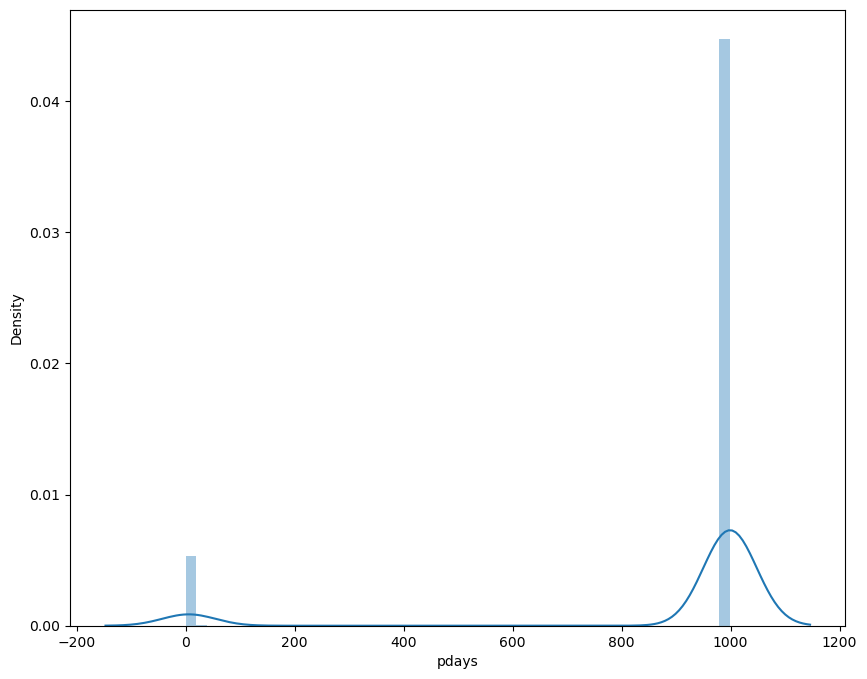

In [15]:
sns.distplot(df['pdays'])

<Axes: xlabel='previous', ylabel='Density'>

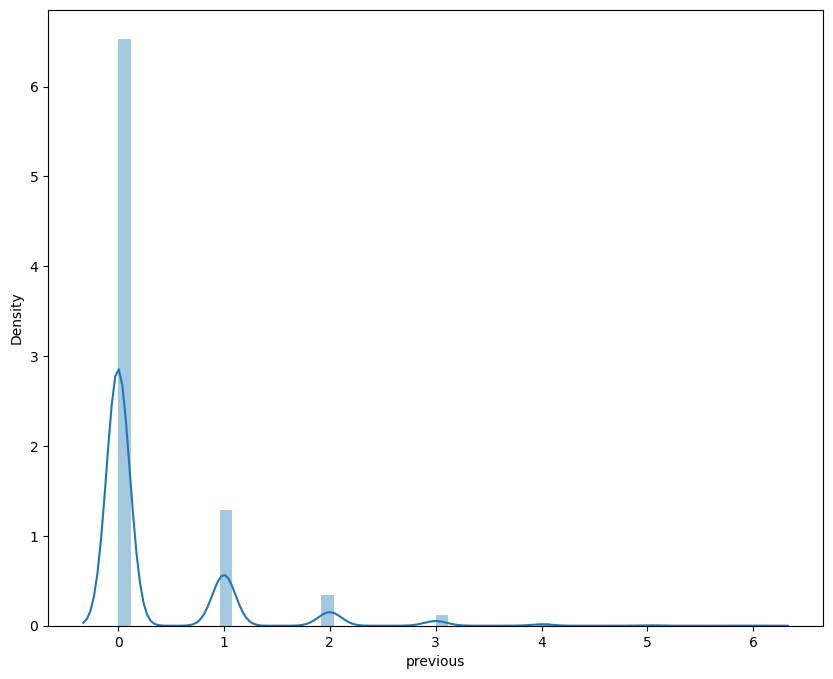

In [16]:
sns.distplot(df['previous'])

### Among the variables previous  and pdays are unnecesary 

In [18]:
x = x.drop(['previous','pdays'],axis=1)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Plot the distribution of all the numeric variables and find the value of skewness for each variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# type your code here
x.skew()

age               0.990535
duration          2.256322
campaign          5.098841
emp.var.rate     -0.181234
cons.price.idx   -0.125216
cons.conf.idx     0.350442
euribor3m        -0.058332
nr.employed      -0.463581
dtype: float64

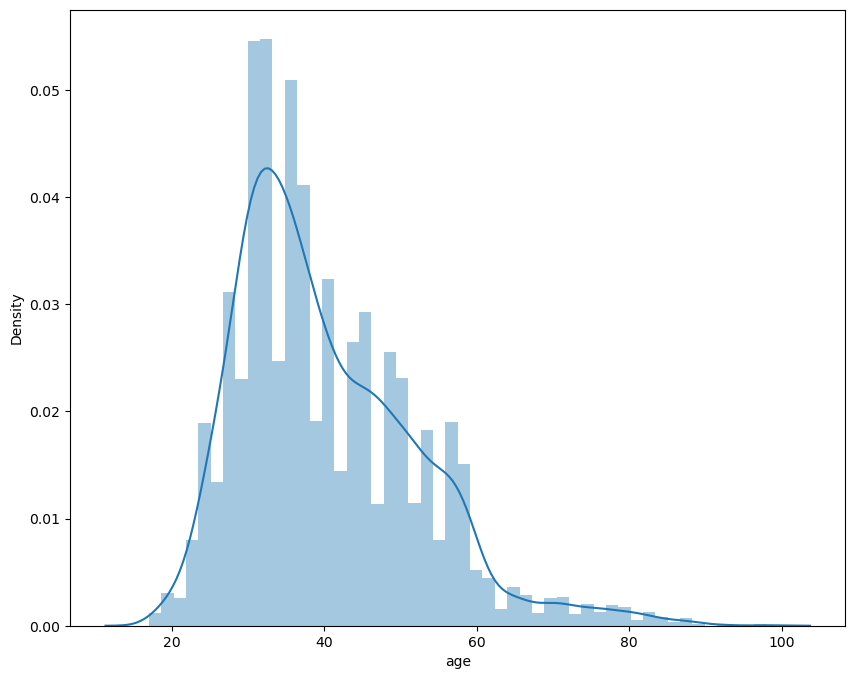

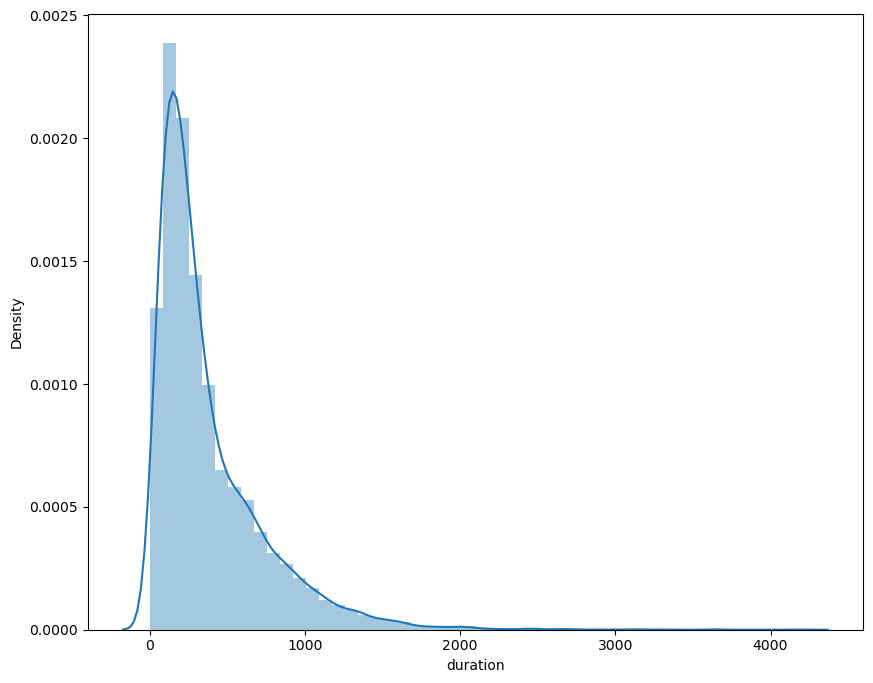

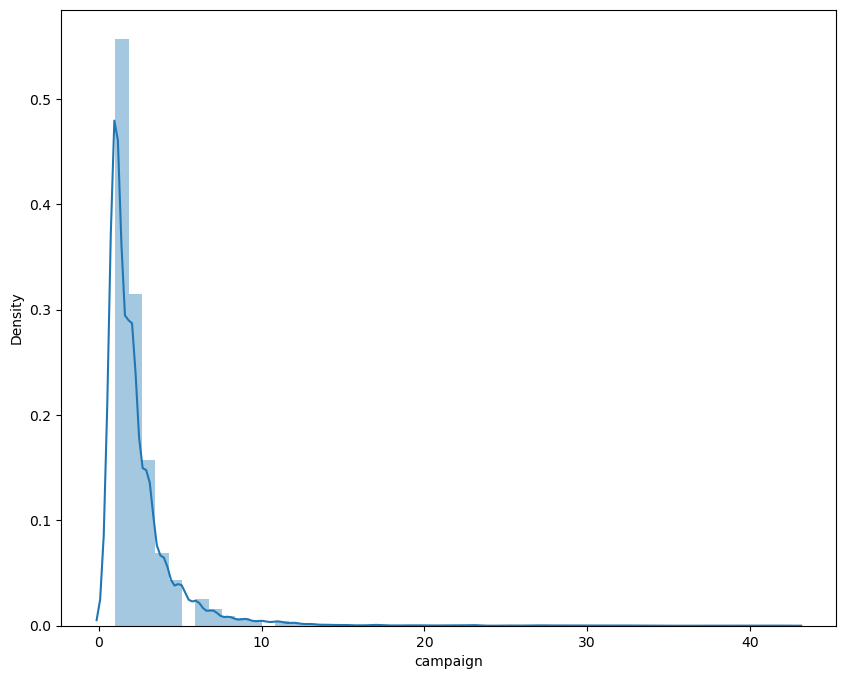

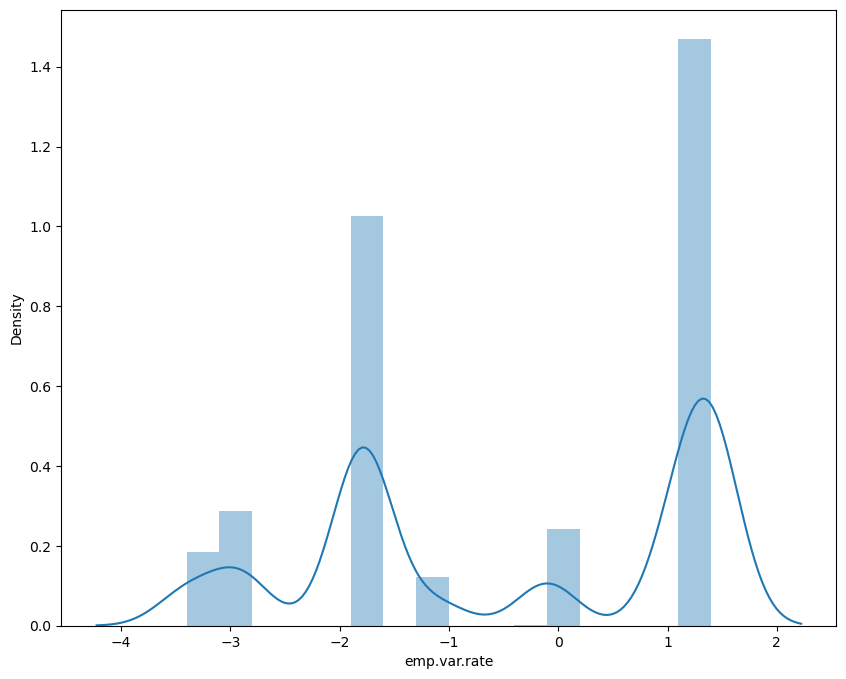

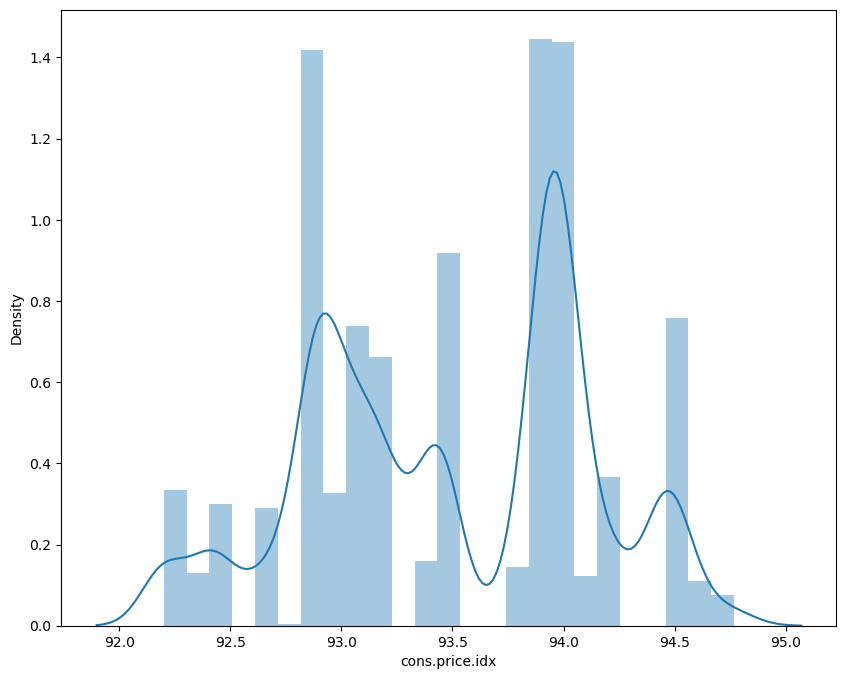

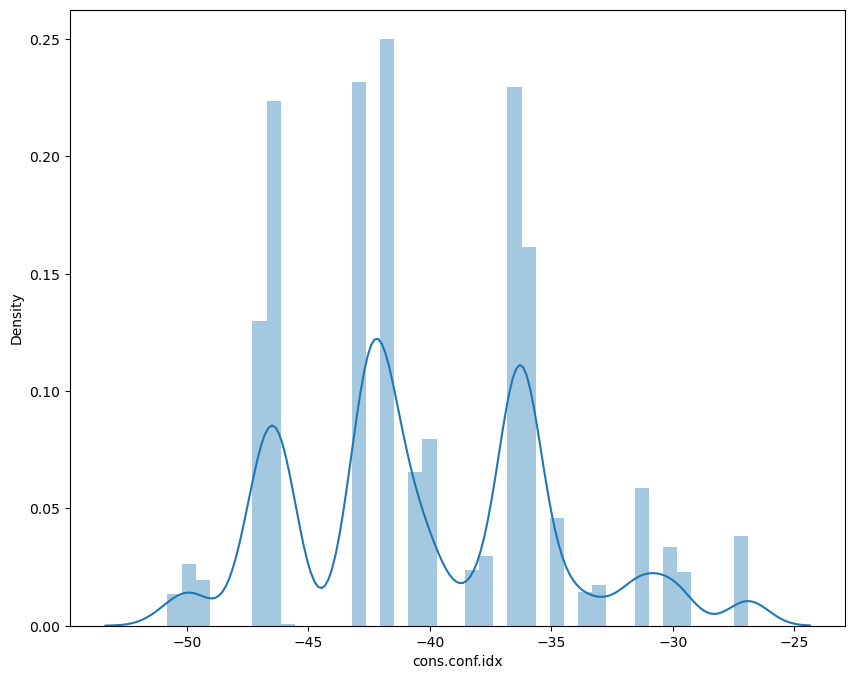

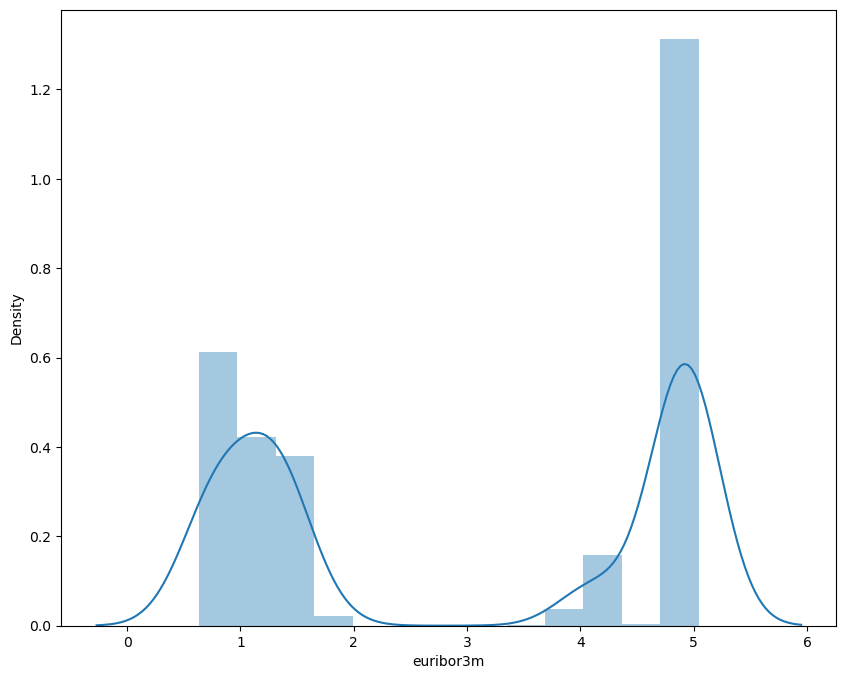

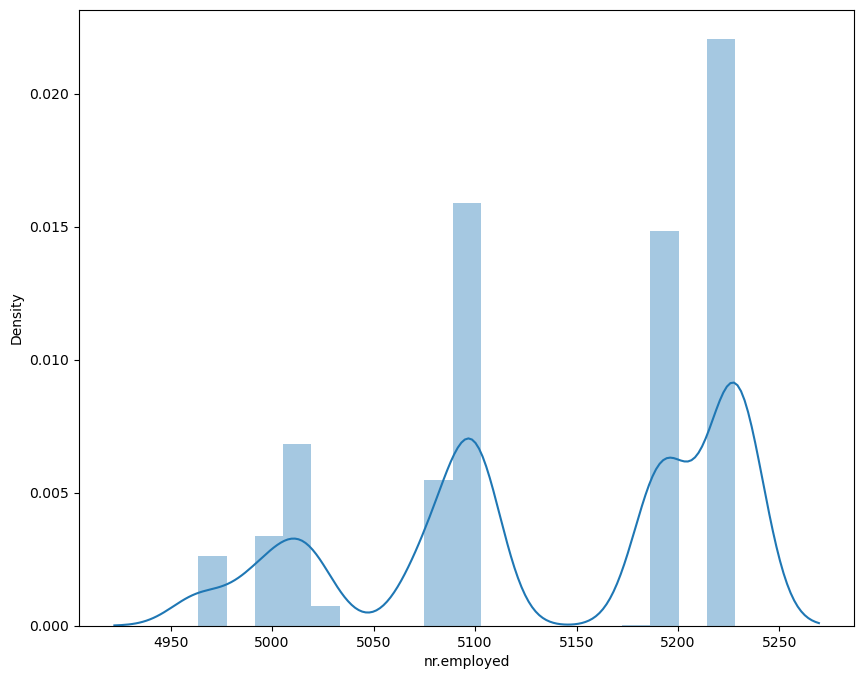

In [20]:
for i in x.columns:
    sns.distplot(x[i])
    plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Plot the distribution of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Axes: xlabel='y', ylabel='count'>

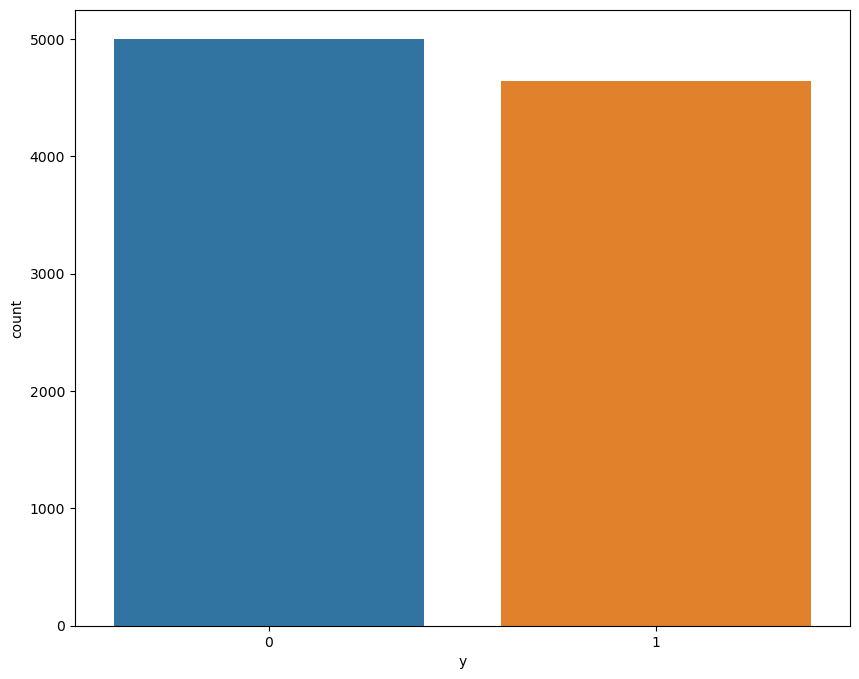

In [22]:
# type your code here
sns.countplot(x=y)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Scale all the numeric variables using standard scalar.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# type your code here
from sklearn.preprocessing import StandardScaler

In [24]:
ss = StandardScaler()

In [25]:
scaled_df = pd.DataFrame(ss.fit_transform(x),columns=x.columns)

<a id="knn"> </a>
## 2. K Nearest Neighbors (KNN)

## We shall use the bank marketing dataset that we cleaned above

Before applying classification techniques to predict whether the client subscribed the term deposit or not, let us split the dataset in train and test set.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# type your code here
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=3672)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Create a function to draw a confusion matrix (heatmap) and a function to plot a roc-auc curve.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Define a function to plot the confusion matrix.

In [78]:
# type your code here
def conf(a,b):
    return(sns.heatmap(confusion_matrix(a,b),annot = True,cmap = 'plasma'))

#### Define a function to plot the ROC curve.

In [98]:
# type your code here
def roc(a,b):
    tpr,fpr,thresh = roc_curve(a,b)
    return(plt.plot(fpr,tpr))

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a knn model on a training dataset with euclidean distance and 3 neighbours to predict whether or not the client subscribed the term deposit. Calculate the accuracy of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
# type your code here

KNN = KNeighborsClassifier(n_neighbors=3,p=2)

In [29]:
knn_model = KNN.fit(x_train,y_train)

In [30]:
knn_pred = knn_model.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [32]:
accuracy_score(y_test,knn_pred)

0.8578838174273858

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Plot a confusion matrix using the function created above and print a classification report. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
# type your code here
confusion_matrix(y_test,knn_pred)

array([[855, 142],
       [132, 799]], dtype=int64)

In [40]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       997
           1       0.85      0.86      0.85       931

    accuracy                           0.86      1928
   macro avg       0.86      0.86      0.86      1928
weighted avg       0.86      0.86      0.86      1928



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the optimal value of 'k' in knn with 3 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    n_neighbors = np.arange(1, 25, 2)
    metric = ['hamming','euclidean','manhattan','Chebyshev']

In [80]:
# type your code here
from sklearn.model_selection import KFold,GridSearchCV,cross_val_score

In [74]:
knn_grid_search=GridSearchCV(estimator=KNeighborsClassifier(),
                             param_grid={'n_neighbors' : np.arange(1, 25, 2),
                                         'metric': ['hamming','euclidean','manhattan','Chebyshev']},
                             cv=3,scoring='accuracy')

In [75]:
knn_grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['hamming', 'euclidean', 'manhattan',
                                    'Chebyshev'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])},
             scoring='accuracy')

In [76]:
knn_grid_search.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=13)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13.  Build a KNN model with the best parameters and find the accuracy. Also generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [67]:
# type your code here
KNN = KNeighborsClassifier(metric='manhattan', n_neighbors=13)

In [68]:
knn_model = KNN.fit(x_train,y_train)

In [69]:
knn_pred_grid = knn_model.predict(x_test)

In [70]:
### Accuracy
accuracy_score(y_test,knn_pred_grid)

0.8755186721991701

In [71]:
print(classification_report(y_test,knn_pred_grid))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       997
           1       0.86      0.88      0.87       931

    accuracy                           0.88      1928
   macro avg       0.88      0.88      0.88      1928
weighted avg       0.88      0.88      0.88      1928



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the area under the receiver operating characteristic curve and the confusion matrix for the tuned KNN model built in question 13.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [85]:
# type your code here
### area under roc 
roc_auc_score(y_test,knn_pred_grid)

0.8757281511559384

<Axes: >

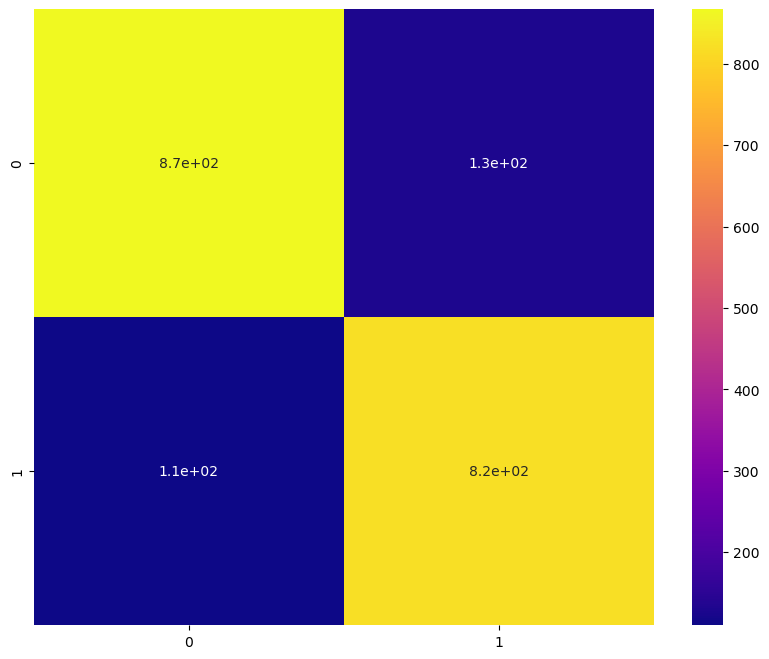

In [86]:
conf(y_test,knn_pred_grid)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Calculate the percentage of misclassified and correctly classified observations.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [90]:
# type your code here
mis_class = sum(knn_pred!= y_test for knn_pred,y_test in zip(knn_pred,y_test))
corr_class = sum(knn_pred == y_test for knn_pred,y_test in zip(knn_pred,y_test))

In [91]:
print(mis_class/len(y_test))
print(corr_class/len(y_test))

0.1421161825726141
0.8578838174273858


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Compute the accuracy for each value of k and append the value in a list 'accuracy'. Build knn models for euclidean distance metric. Consider only the odd numbers between the range 1 and 25 for the 'k'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [81]:
# type your code here
accuracy = []
for i in np.arange(1,26,2):
    knn = KNeighborsClassifier(n_neighbors=i,p=2,n_jobs=-1)
    score = cross_val_score(knn,x_train,y_train,cv=3,n_jobs=-1)
    score = score.mean()
    accuracy.append(score)

In [82]:
accuracy

[0.8121106363958773,
 0.83921112518609,
 0.8475100656277416,
 0.8526968718738034,
 0.8550308464006142,
 0.8577540773296487,
 0.8593098417397279,
 0.8563276110220706,
 0.8581428797002988,
 0.8589207366813622,
 0.8589208880252199,
 0.8573652749589984,
 0.8578837790157706]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Draw a line plot to see the accuracy (list created in the above question) for each value of K using euclidean distance as a metric of KNN model and find the optimal value of 'k'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    n_neighbors = np.arange(1, 25, 2)

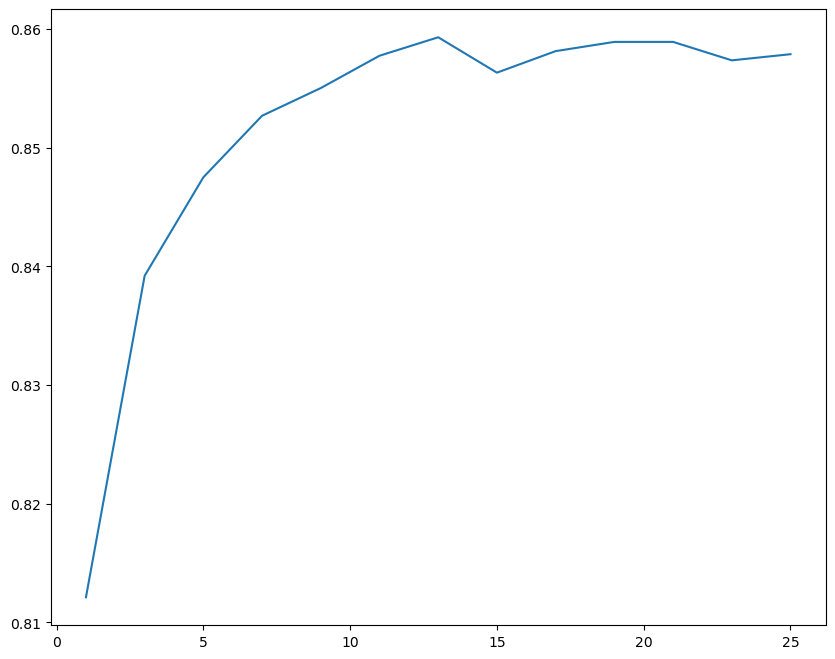

In [83]:
plt.plot(np.arange(1,26,2),accuracy)

<a id="nb"> </a>
## 3. Naive Bayes

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Build a Gaussian naive bayes model and generate a classification report. Also tell how well is the model performing.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
# type your code here
from sklearn.naive_bayes import GaussianNB

In [43]:
NB = GaussianNB()

In [44]:
nb_model = NB.fit(x_train,y_train)

In [45]:
nb_pred = nb_model.predict(x_test)

In [46]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       997
           1       0.75      0.83      0.79       931

    accuracy                           0.78      1928
   macro avg       0.79      0.79      0.78      1928
weighted avg       0.79      0.78      0.78      1928



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Find the area under the receiver operating characteristic curve and the confusion matrix for the Naive Bayes model built in question 18.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
# type your code here
from sklearn.metrics import roc_curve,roc_auc_score

In [48]:
roc_auc_score(y_test,nb_pred)

0.7862938978051233

In [50]:
fpr,tpr,thresh = roc_curve(y_test,nb_pred)

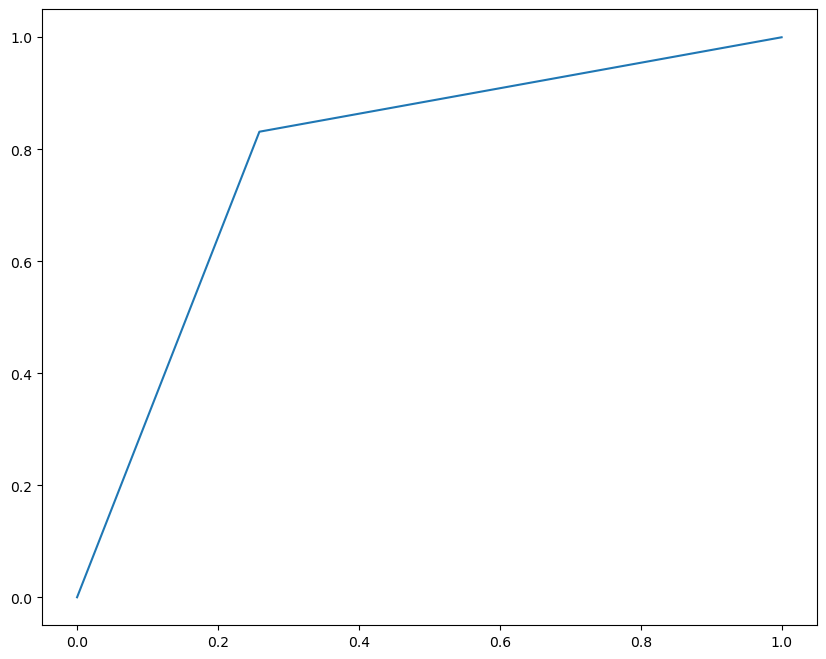

In [54]:
plt.plot(fpr,tpr)

In [58]:
y_test_prob = nb_model.predict_proba(x_test)
y_test_prob

array([[9.98081925e-01, 1.91807482e-03],
       [6.13699716e-02, 9.38630028e-01],
       [9.87934230e-01, 1.20657698e-02],
       ...,
       [1.20563094e-03, 9.98794369e-01],
       [9.42298229e-04, 9.99057702e-01],
       [2.12775048e-03, 9.97872250e-01]])

In [60]:
nb_pred_prob = y_test_prob[:,0]

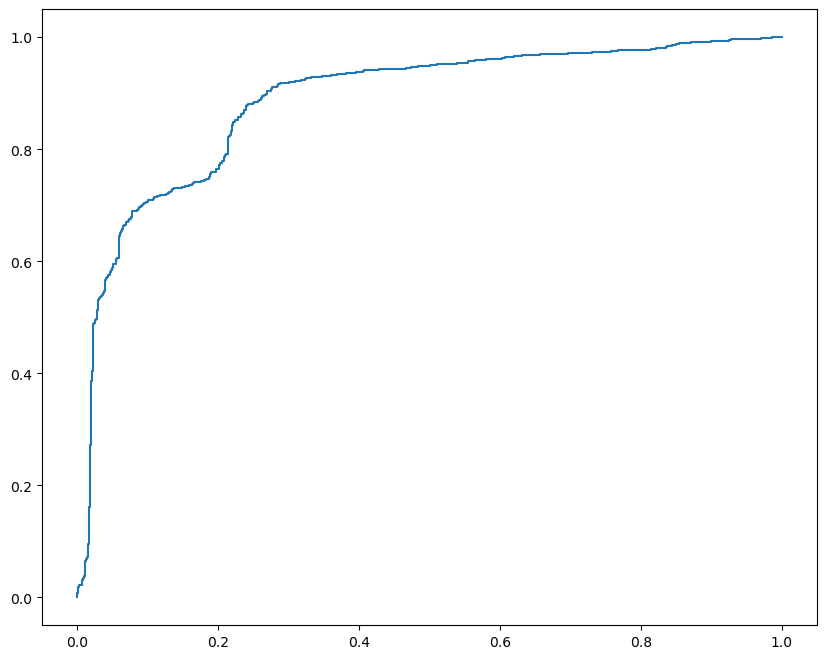

In [99]:
roc(y_test,nb_pred_prob)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a Gaussian Naive Bayes model and perform 10 fold cross validation and find the average accuracy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [92]:
# type your code here
from sklearn.model_selection import cross_val_score

In [93]:
nb = GaussianNB()

In [95]:
cross_val_score(nb,x_train,y_train,cv=10).mean()

0.7777517926385893